## Task B

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import string
from nltk.corpus import stopwords
from nltk import FreqDist

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read in scraped Tweets
dfTweets = pd.read_csv('UniqueCombinedTweets.csv')

# Remove additional index column
dfTweets = dfTweets.drop(columns= 'Unnamed: 0')

### Creating and Cleaning Corpus

In [4]:
# Function to remove punctuation
def punctuation_extermination(s):
    o = str.maketrans('', '', string.punctuation)
    return str(s).translate(o)

# Removing punctation from comments
dfTweets['text'] = dfTweets['text'].apply(punctuation_extermination)

In [5]:
def build_corpus(text_col):
    """To build a text corpus by stitching all the records together.Input the text column"""
    corpus = ""
    for word in text_col:
        corpus += word
    return corpus

In [6]:
# Building the corpus
corpus = build_corpus(dfTweets['text'])

# Converting all the words into lowercase
corpus = corpus.lower()

# Removing stropwords from corpus
corpus = corpus.split()
corpusNoStop = [word for word in corpus if word not in stopwords.words("english")]

### Determining Key Issues

In [7]:
def plot_word_frequency(words, top_n=125):
    """Function to plot the word frequencies"""
    word_freq = FreqDist(words)
    labels = [element[0] for element in word_freq.most_common(top_n)]
    counts = [element[1] for element in word_freq.most_common(top_n)]
    tempDict = {"Labels": labels, "Count": counts}
    plt.figure(figsize=(15,5))
    plt.title("Most Frequent Words in the Corpus - Excluding STOPWORDS")
    plt.ylabel("Count")
    plt.xlabel("Word")
    plt.xticks(rotation=90)
    plot = sns.barplot(data= tempDict, x= "Labels", y= "Count")
    return plot

<AxesSubplot:title={'center':'Most Frequent Words in the Corpus - Excluding STOPWORDS'}, xlabel='Word', ylabel='Count'>

/usr/local/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128680 (\N{POLICE CARS REVOLVING LIGHT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


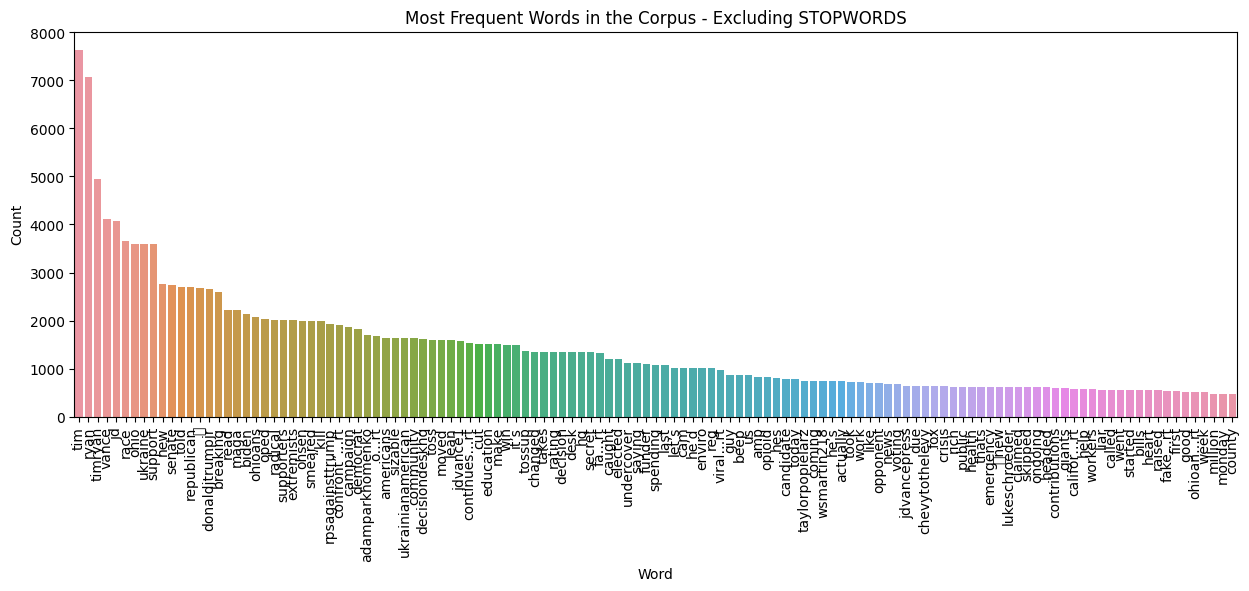

In [9]:
plot_word_frequency(corpusNoStop)

The four key issues found are: Education, Opioid (opioid crisis), Ukraine, health (healthcare).

## Task C

### Candidate Name Replacement (standardizing candidate names)

In [8]:
# Dictionary with variations of candidates' names and replacement
namesDict = {'tim': 'tim ryan', 'ryan': 'tim ryan', 'timryan': 'tim ryan', 'jd': 'jd vance', 'vance': 'jd vance'}

In [9]:
# Function to switch candidate nicknames with unified names
def candidateSwitch(x):
    t = x.split()
    for word in t:
        if word in namesDict:
            x = x.replace(word, namesDict[word])
    return x

# Switching nicknames to actual names in comments
corpusSwapped = [candidateSwitch(x) for x in corpusNoStop]
dfTweets['text'] = dfTweets['text'].apply(lambda i: i.lower())
dfTweets['text'] = dfTweets['text'].apply(lambda i: (candidateSwitch(i)))

### Lift Analysis

In [10]:
# List of candidates
candidates = ['tim ryan', 'jd vance']

# List of issues
issues = ['education', 'opioid', 'ukraine', 'health']

In [11]:
dfTweets.shape[0]

20171

In [12]:
lift_dict = pd.DataFrame(index= candidates, columns= issues)
lift_dict

education opioid ukraine health
tim ryan       NaN    NaN     NaN    NaN
jd vance       NaN    NaN     NaN    NaN

In [24]:
lift_dict = pd.DataFrame(index= candidates, columns= issues)
print 
total_shape = dfTweets.shape[0]
for i in range(len(issues)): 
    for j in range(len(candidates)):
        brand_1 = issues[i]
        brand_2 = candidates[j]
        count_1 = 0
        count_2 = 0
        count_3 = 0

        
        for txt in dfTweets.text.values:
            if brand_1 in txt and brand_2 in txt:
                count_3 = count_3 + 1
                
            elif brand_1 in txt and brand_2 not in txt:
                count_1 = count_1 + 1 
              
            elif brand_1 not in txt and brand_2 in txt:
                count_2 = count_2 + 1
                
        
        if(brand_1==brand_2):
            lift_dict[brand_1][brand_2] = 0

        else: 
            pa = count_1/total_shape
            pb = count_2/total_shape
            pab = count_3/total_shape

            if(pab!=0):
                ans = (pa*pb)/pab
            else:
                ans = 0

            if(ans!=0):
                lift_dict[brand_1][brand_2] = round(1/ans,3)
            else:
                lift_dict[brand_1][brand_2] = 0


            
       

In [25]:
lift_dict

education  opioid ukraine   health
tim ryan          0  48.159       0  202.945
jd vance  11233.352    0.47   0.973    0.016

In [26]:
lift_dict.apply(pd.to_numeric).style.background_gradient(axis=0,cmap='Blues')

## Sentiment Analysis

In [29]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [34]:
for i in dfTweets['text']:
    vs = analyzer.polarity_scores(i)
    print("{:-<65} {}".format(i, str(vs)))


rt pollprojectusa poll centerstreetpacmomentiveai 

2022 ohsen general election
d tim tim ryan tim ryan 49 9
r jd jd vance jd vance 38
undecided 1… {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'compound': -0.2263}
rt pollprojectusa poll centerstreetpacmomentiveai 

2022 ohsen general election
d tim tim ryan tim ryan 49 9
r jd jd vance jd vance 38
undecided 1… {'neg': 0.073, 'neu': 0.927, 'pos': 0.0, 'compound': -0.2263}
rt taylorpopielarz just in

ohsen candidate tim ryan d raised 172 million between july and september his campaign says

•105455… {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
pollprojectusa centerstreetpac momentiveai hahaha ohsen---------- {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'compound': 0.5574}
rt ecreights beep beep all aboard the workers first express tim ryan is hitting the road to talk to every last voter as the race for … {'neg': 0.0, 'neu': 0.959, 'pos': 0.041, 'compound': 0.0258}
joingles in ten minutes ill be out the door to put up more yardsigns for d

In [47]:
for txt in dfTweets.text.values:
    if 'tim ryan' in txt and 'education' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))


In [48]:
for txt in dfTweets.text.values:
    if 'tim ryan' in txt and 'opiod' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))
 

tim tim ryan has criticized his republican opponents record on the opiod crisis but tim ryan himself has taken 27 millio… httpstcozalbnzpmt4 {'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.5106}
rt vthepr wsmartin218 tim tim ryan tim ryan i dont think you read what you posted

 no where does it say that tim tim ryan tim ryan created a fake opiod nonprof… {'neg': 0.146, 'neu': 0.799, 'pos': 0.055, 'compound': -0.5106}


In [49]:
for txt in dfTweets.text.values:
    if 'tim ryan' in txt and 'opiod' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))

tim tim ryan has criticized his republican opponents record on the opiod crisis but tim ryan himself has taken 27 millio… httpstcozalbnzpmt4 {'neg': 0.177, 'neu': 0.823, 'pos': 0.0, 'compound': -0.5106}
rt vthepr wsmartin218 tim tim ryan tim ryan i dont think you read what you posted

 no where does it say that tim tim ryan tim ryan created a fake opiod nonprof… {'neg': 0.146, 'neu': 0.799, 'pos': 0.055, 'compound': -0.5106}


In [50]:
for txt in dfTweets.text.values:
    if 'tim ryan' in txt and 'ukraine' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))


In [55]:
for txt in dfTweets.text.values:
    if 'tim ryan' in txt and 'health' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))


rt lukeschroeder tim tim ryan tim ryan claimed he skipped work today due to the ongoing public health emergency 

hes actually headed to califor… {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.3818}
rt lukeschroeder tim tim ryan tim ryan claimed he skipped work today due to the ongoing public health emergency 

hes actually headed to califor… {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.3818}
rt lukeschroeder tim tim ryan tim ryan claimed he skipped work today due to the ongoing public health emergency 

hes actually headed to califor… {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.3818}
rt lukeschroeder tim tim ryan tim ryan claimed he skipped work today due to the ongoing public health emergency 

hes actually headed to califor… {'neg': 0.102, 'neu': 0.898, 'pos': 0.0, 'compound': -0.3818}
rt lukeschroeder tim tim ryan tim ryan claimed he skipped work today due to the ongoing public health emergency 

hes actually headed to califor… {'neg': 0.102, 'neu': 

In [56]:
for txt in dfTweets.text.values:
    if 'jd vance' in txt and 'education' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))


rt mariannezarro dear ohioans listen up republican jd jd vance jd vance is cutting education defund the police amp raise taxes if elected in ohio… {'neg': 0.055, 'neu': 0.849, 'pos': 0.096, 'compound': 0.2732}
rt mariannezarro dear ohioans listen up republican jd jd vance jd vance is cutting education defund the police amp raise taxes if elected in ohio… {'neg': 0.055, 'neu': 0.849, 'pos': 0.096, 'compound': 0.2732}
rt mariannezarro dear ohioans listen up republican jd jd vance jd vance is cutting education defund the police amp raise taxes if elected in ohio… {'neg': 0.055, 'neu': 0.849, 'pos': 0.096, 'compound': 0.2732}
rt mariannezarro dear ohioans listen up republican jd jd vance jd vance is cutting education defund the police amp raise taxes if elected in ohio… {'neg': 0.055, 'neu': 0.849, 'pos': 0.096, 'compound': 0.2732}
rt mariannezarro dear ohioans listen up republican jd jd vance jd vance is cutting education defund the police amp raise taxes if elected in ohio… {'neg': 0.055

In [57]:
for txt in dfTweets.text.values:
    if 'jd vance' in txt and 'opiod' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))


In [58]:
for txt in dfTweets.text.values:
    if 'jd vance' in txt and 'ukraine' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))


rt rpsagainsttrump good morning and happy monday to everyone except those like jd jd vance jd vance who dont care what happens to ukraine one way… {'neg': 0.078, 'neu': 0.652, 'pos': 0.27, 'compound': 0.7559}
rt rpsagainsttrump good morning and happy monday to everyone except those like jd jd vance jd vance who dont care what happens to ukraine one way… {'neg': 0.078, 'neu': 0.652, 'pos': 0.27, 'compound': 0.7559}
rt rpsagainsttrump good morning and happy monday to everyone except those like jd jd vance jd vance who dont care what happens to ukraine one way… {'neg': 0.078, 'neu': 0.652, 'pos': 0.27, 'compound': 0.7559}
rt rpsagainsttrump good morning and happy monday to everyone except those like jd jd vance jd vance who dont care what happens to ukraine one way… {'neg': 0.078, 'neu': 0.652, 'pos': 0.27, 'compound': 0.7559}
rt rpsagainsttrump good morning and happy monday to everyone except those like jd jd vance jd vance who dont care what happens to ukraine one way… {'neg': 0.078, 'n

In [59]:
for txt in dfTweets.text.values:
    if 'jd vance' in txt and 'health' in txt:
        vs = analyzer.polarity_scores(txt)
        print("{:-<65} {}".format(txt, str(vs)))


rt dovewoman1 vote timryan4ohio he works to bring new jobs to ohio he fights for our vets healthcare while jd jd vance jd vance says he’s “not fam… {'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'compound': -0.4019}
hey ohiojd jd vance really wants you to be stupid and unhealthy 
what are you going to do about that httpstcouhyjal3qri {'neg': 0.264, 'neu': 0.736, 'pos': 0.0, 'compound': -0.7783}
